## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [ ]:
import torch.nn as nn
import torch

In [ ]:
input = torch.randn(128,20)
print(input,'\n')

m = nn.Linear(20,30) # 이건 신경망!
print(m,'\n')

output = m(input)
print(output)
print(output.size())
# (128,20)을 (20,30)짜리 신경망에 통과시켜 (128,30) 출력을 얻었다!

tensor([[-0.0875,  1.0646,  0.1331,  ...,  0.3704, -0.0191, -0.1896],
        [-0.3795, -0.7877,  1.8739,  ..., -1.0087, -0.0480,  0.1094],
        [-0.8219, -0.5478, -0.6965,  ...,  0.8083,  0.7152, -0.2687],
        ...,
        [-0.2748,  0.4286, -0.5434,  ...,  1.8325,  0.4978,  0.6058],
        [-1.7414, -1.8556,  0.3978,  ..., -0.3537,  0.9849, -1.1195],
        [ 0.0729, -0.6488, -0.0305,  ...,  0.9370,  1.5677, -0.1094]]) 

Linear(in_features=20, out_features=30, bias=True) 

tensor([[-0.9310, -0.0443,  0.1697,  ...,  0.1749,  0.8228,  0.1386],
        [ 0.2317, -0.0307, -0.0153,  ..., -0.4630, -0.3184, -0.4922],
        [ 0.4025, -0.1936, -0.3596,  ...,  0.6281,  0.0428, -0.3308],
        ...,
        [ 0.3369,  0.3717,  0.5916,  ...,  0.9587,  0.2594,  0.1770],
        [ 1.4190, -0.2391, -0.6570,  ..., -0.4708, -0.8050,  0.2277],
        [-0.3701, -0.4978,  0.5307,  ..., -0.0666, -0.1388,  0.4815]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [ ]:
input = torch.randn(20, 16, 50, 100)
print(input.size(),'\n')

m = nn.Conv2d(16, 33, kernel_size=3, stride=2) # 이건 합성곱 신경망!
# 커널 사이즈는 필터 사이즈(여기선 3*3), 스트라이드는 필터가 조금씩 옮겨가는 정도
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1)) # Conv2D 가 아닌 Conv2d임에 주의
# 딜리에이션은 한 픽셀에서 다른 픽셀까지의 거리
print(m,'\n')

output = m(input)
print(output.size())

torch.Size([20, 16, 50, 100]) 

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1)) 

torch.Size([20, 33, 26, 100])


<Dilation의 해석>  
https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈


In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
# weights 확인
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [ ]:
# weight는 detach()를 통해 꺼내 주어야 numpy() 함수를 통해 변환이 가능하다
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

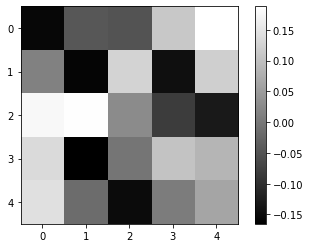

In [ ]:
# 가중치를 시각화 해볼까?
import matplotlib.pyplot as plt

plt.imshow(weight[0,0,:,:],'gray') # jet 옵션으로 바꾸면 비비드한 컬러로도 볼 수 있다. 아악 내 눈
plt.colorbar()
plt.show()

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [ ]:
# mnist 이미지에 적용
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std=(1.0,))])

In [ ]:
trainset = datasets.MNIST(root = '/content',
                          train = True, download = True,
                          transform = mnist_transforms)

testset = datasets.MNIST(root = '/content',
                        train = False, download = True,   # train이 아니라 test니까 train 옵션은 False로 체크
                        transform = mnist_transforms)

In [ ]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만큼 데이터를 가져온다
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [ ]:
dataiter = iter(train_loader)
image, label = dataiter.next() # 이게 뭐랬지? 반복 가능한 객체에서 하나씩 그 다음 값을 꺼내주는 함수!
print(image.shape)
print(label.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8])


In [ ]:
# 차원을 줄여도 보고
print(image[0].shape)
input_img = torch.squeeze(image[0])
print(input_img.size())

torch.Size([1, 28, 28])
torch.Size([28, 28])


In [ ]:
# 차원을 늘려도 보고
input_data = torch.unsqueeze(image[0],dim=0)
print(input_data.size())

torch.Size([1, 1, 28, 28])


In [ ]:
# layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))

output_data = layer(input_data)
output = output_data.data
output_arr =  output.numpy()
print(output_arr.shape)

(1, 20, 24, 24)


위에 layer에
커널 사이즈를 5, 5로 줘서
4개 줄어들었습니다


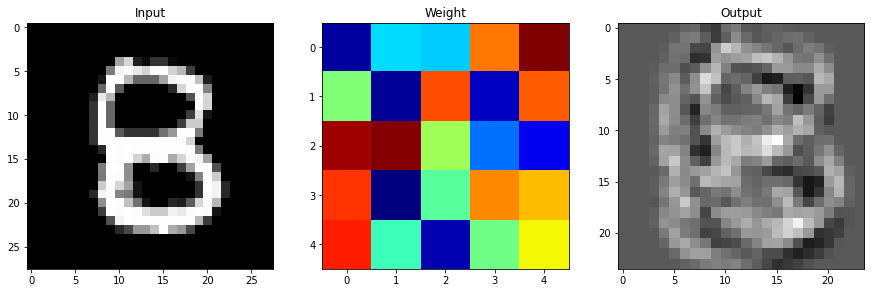

In [ ]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('Input')
plt.imshow(input_img, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'gray')

plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용


In [ ]:
# MaxPooling
import torch.nn.functional as F

print(output_arr.shape)
pool = F.max_pool2d(output,2,2)
pool_arr = pool.numpy()
print(pool_arr.shape)

(1, 20, 24, 24)
(1, 20, 12, 12)


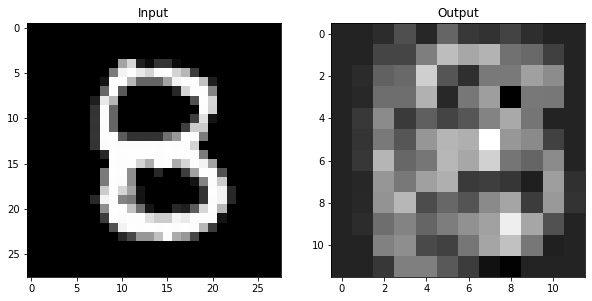

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_img, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')

plt.show()

In [ ]:
# 선형 레이어(Linear Layer) : 선형이기 때문에 1d만 가능하다.
# 이미지를 1줄 짜리 벡터로 펼쳤던 그걸 생각하면 됨
# view를 이용해 1d로 펼쳐 주자.

flatten = input_img.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784,10)(flatten) # output이 10개
lin.shape

torch.Size([1, 10])

In [ ]:
lin # 선형변환한 결과

tensor([[ 0.1630,  0.4411, -0.1777,  0.2351, -0.3867, -0.2696, -0.0896,  0.1146,
          0.1891,  0.3277]], grad_fn=<AddmmBackward0>)

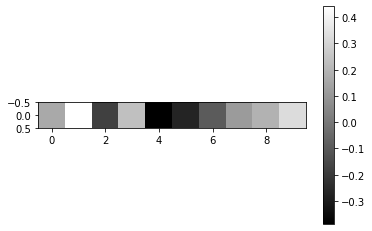

In [ ]:
plt.imshow(lin.detach().numpy(), 'gray')
plt.colorbar()
plt.show()

In [ ]:
# 비선형 활성화(Non-linear Activation) - 근데 이제 softmax를 이용한

with torch.no_grad():
  flatten = input_img.view(1, 28*28)
  lin=nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.0854, 0.0832, 0.0643, 0.1422, 0.0922, 0.1261, 0.0971, 0.1228, 0.0847,
         0.1021]])

In [ ]:
import numpy as np
np.sum(softmax.numpy())

1.0

## 선형 회귀 모델

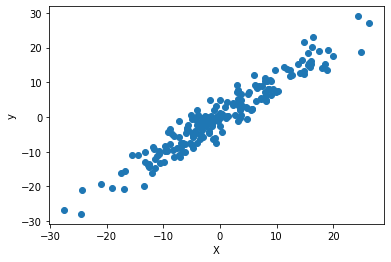

In [ ]:
# 데이터 생성

X = torch.randn(200,1)*10 # 랜덤한 산점도를 그려 학습해 보자
y = X + 3*torch.randn(200,1)

plt.scatter(X.numpy(), y.numpy())
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
class LinearRegressionModel(nn.Module): # nn.Module을 상속받는 자식 클래스 생성
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    pred = self.linear(x)
    return pred

In [ ]:
model = LinearRegressionModel() # 위에서 만든 클래스로 객체 생성
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.1009]], requires_grad=True), Parameter containing:
tensor([-0.0866], requires_grad=True)]


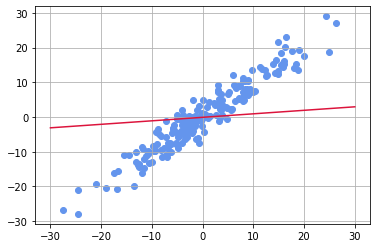

In [ ]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item() # 스칼라 값 1개라면 그 값을 꺼내준다.

x1 = np.array([-30,30])
y1 = w1*x1 + b1

plt.plot(x1,y1,color='crimson')
plt.scatter(X, y, color='cornflowerblue')
plt.grid()
plt.show()

In [ ]:
# 손실 함수 및 옵티마이저
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# 모델 학습

epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred,y)
  losses.append(loss.item())
  loss.backward() # 역전파 수행 후 자동 미분 결과를 업데이트한다

  optimizer.step() # 옵티마이저 스텝을 다음으로 진행

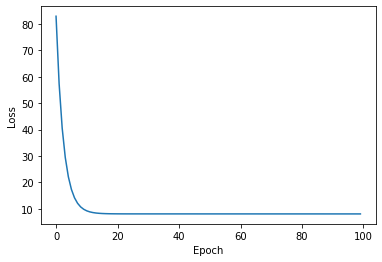

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

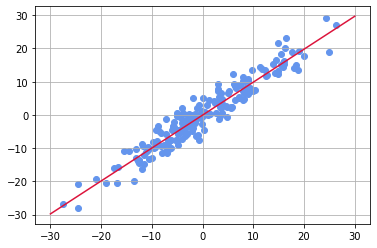

In [ ]:
w1, b1 = w[0][0].item(), b[0].item() # 스칼라 값 1개라면 그 값을 꺼내준다.

x1 = np.array([-30,30])
y1 = w1*x1 + b1

plt.plot(x1,y1,color='crimson')
plt.scatter(X, y, color='cornflowerblue')
plt.grid()
plt.show()

# 학습했더니 이제는 제대로 찾아간다.

#### FashionMNIST 분류 모델

In [ ]:
# 데이터 로드
import torchvision
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [ ]:
trainset = datasets.FashionMNIST(root='/content',
                                 train=True, download=True,
                                 transform=transform)

testset = datasets.FashionMNIST(root='/content',
                                 train=False, download=True,
                                 transform=transform)

In [ ]:
!ls

FashionMNIST  fashion_mnist.pth  MNIST	sample_data


In [ ]:
train_loader1 = DataLoader(trainset, batch_size=128, num_workers=2)
test_loader1 = DataLoader(testset, batch_size=128, num_workers=2)

In [ ]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하는 함수
# next는 이터레이터에서 값을 차례대로 꺼내는 함수

image, label = next(iter(train_loader1))
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [ ]:
# 분류할 구분선을 만들어 주자
label_map = {0:'T-Shirt',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle Boot'}

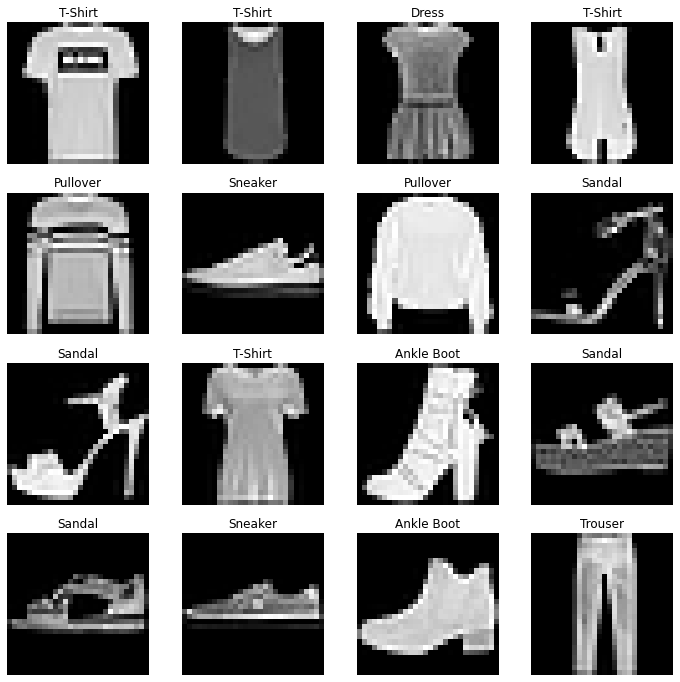

In [ ]:
fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12],[ax13,ax14,ax15,ax16]]= plt.subplots(figsize=(12,12), ncols=4, nrows=4)

for i in range(1,17):

  img = image[i].squeeze()
  label_index = label[i].item()
  lb = label_map[label_index]

  globals()['ax{}'.format(i)].imshow(img, cmap='gray')
  globals()['ax{}'.format(i)].set_title(lb)
  globals()['ax{}'.format(i)].axis('off')
plt.show()

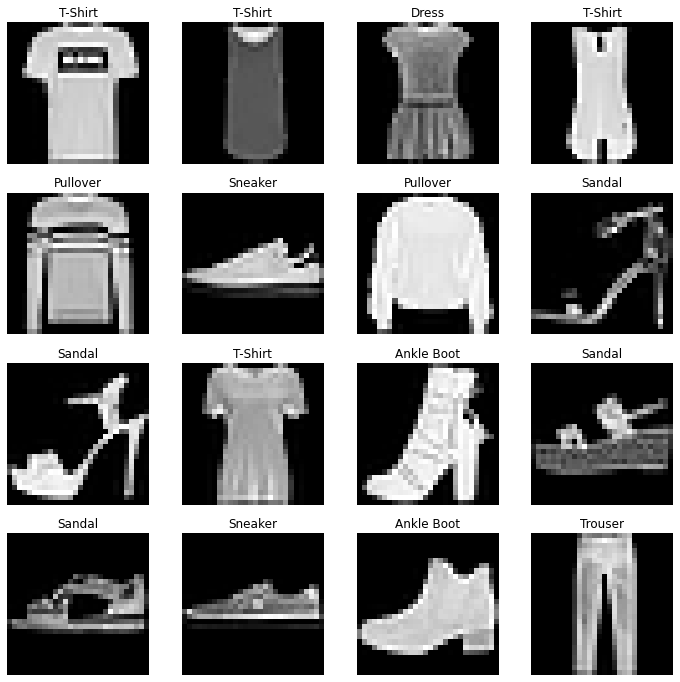

In [ ]:
# 이렇게도 나타내 보자.
figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1,cols*rows+1):
  img = image[i].squeeze()
  label_idx = label[i].item()
  lab = label_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(lab) 
  plt.axis('off')
  plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
from re import S
# 모델 정의 및 파라미터
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s 

    return num_features
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [ ]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[-0.0836, -0.0540, -0.1085, -0.0096, -0.1483,  0.0594,  0.0430,  0.0354,
          0.0303,  0.0895]], grad_fn=<AddmmBackward0>)


In [ ]:
# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # 확률적 경사하강법에 모멘텀을 적용하여 지역 최솟값에 빠지지 않도록 했다.

In [ ]:
# 모델 학습
total_batch = len(train_loader1)
print(total_batch)

469


zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [ ]:
for epoch in range(10):
  running_loss = 0.0 # 초기화

  for i, data in enumerate(train_loader1,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch:{}, Iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/20000))
      running_loss = 0.0

Epoch:1, Iter:100, Loss:0.01151414577960968
Epoch:1, Iter:200, Loss:0.011490612721443177
Epoch:1, Iter:300, Loss:0.011459542107582092
Epoch:1, Iter:400, Loss:0.011422559213638305
Epoch:2, Iter:100, Loss:0.011288852322101592
Epoch:2, Iter:200, Loss:0.011102469873428346
Epoch:2, Iter:300, Loss:0.010520785701274871
Epoch:2, Iter:400, Loss:0.008670289361476898
Epoch:3, Iter:100, Loss:0.0056245813846588135
Epoch:3, Iter:200, Loss:0.005262426620721817
Epoch:3, Iter:300, Loss:0.004949156650900841
Epoch:3, Iter:400, Loss:0.004613416016101837
Epoch:4, Iter:100, Loss:0.004375675603747368
Epoch:4, Iter:200, Loss:0.004300076580047607
Epoch:4, Iter:300, Loss:0.0041307363241910935
Epoch:4, Iter:400, Loss:0.0038953469812870027
Epoch:5, Iter:100, Loss:0.0038109957218170165
Epoch:5, Iter:200, Loss:0.0038165800869464873
Epoch:5, Iter:300, Loss:0.003700124081969261
Epoch:5, Iter:400, Loss:0.0035158678889274596
Epoch:6, Iter:100, Loss:0.003462481513619423
Epoch:6, Iter:200, Loss:0.003488559281826019
Epoch

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [ ]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [ ]:
# 모델 테스트

def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fit = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0)))  # rgb -> gbr
  plt.show()

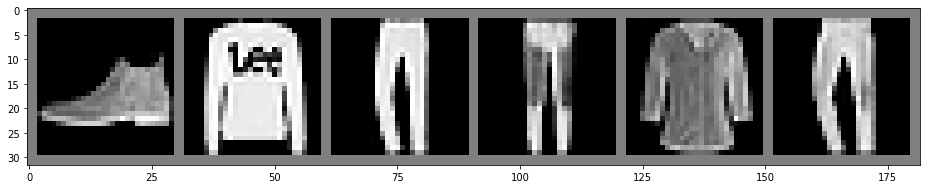

In [ ]:
dataiter = iter(test_loader1)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
outputs = net(images)
_,predicted = torch.max(outputs,1)
print(predicted)

tensor([9, 2, 1, 1, 6, 1, 4, 4, 5, 7, 4, 5, 8, 3, 4, 1, 2, 2, 8, 0, 0, 5, 7, 7,
        1, 6, 4, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 9, 4, 9, 6, 1,
        4, 4, 2, 6, 5, 8, 4, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0,
        2, 0, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 1, 2, 7, 1, 8,
        0, 1, 4, 2, 3, 4, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [ ]:
print(''.join('{}, '.format(label_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, Pullover, Trouser, Trouser, Shirt, Trouser, 


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(100 * correct / total)

5.51
